## Import the Pickle

In [1]:
import pickle

pickle_tweets = open(".gitignore/tweets_jan2019", "rb")
example_tweets = pickle.load(pickle_tweets)
example_tweets = example_tweets[["datetime","text"]]
#example_tweets["index1"] = example_tweets.index
example_tweets.head()

,datetime,text
0,2019-01-01 00:00:00,"@ #1, Bitcoin with unit price of $3,742.7, m..."
1,2019-01-01 00:00:00,Learn it. 2018 Sees Bitcoin ’s Lowest Average...
2,2019-01-01 00:00:01,"仮想通貨の時価総額 $125,622,003,150 BTC 価格:$3734.04..."
3,2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...
4,2019-01-01 00:00:01,"Bitcoin - BTC Price: $3,742.70 Change in 1h: ..."


### Take a sample

In [3]:
example_tweets = example_tweets.head(10000)

### Dataframe to Dictionary

In [4]:
# create a dictionary out of the dataframe with two values -> datetime and text
tweet_dict = example_tweets.T.to_dict("list")
#tweet_dict

### Detect Language

In [5]:
from langdetect import detect 
blanco = "blanco"

# Create a list saving all the languages of the tweets
language_list =[]
for i in tweet_dict:
    try:
        language = detect(tweet_dict[i][1])
        language_list.append(language)
    except:
        language_list.append(blanco)        

In [6]:
print(set(language_list))

{'es', 'zh-cn', 'de', 'en', 'ar', 'ru', 'et', 'no', 'ro', 'th', 'bg', 'hi', 'id', 'tl', 'so', 'blanco', 'pt', 'sl', 'nl', 'cy', 'sk', 'cs', 'ko', 'hr', 'tr', 'vi', 'mk', 'it', 'fi', 'af', 'he', 'fr', 'ja', 'sq', 'pl', 'sw', 'sv', 'ca'}


In [7]:
example_tweets["Language"] = language_list

In [8]:
# Cut out all tweets which are not english
example_tweets = example_tweets.loc[example_tweets['Language'] == "en"]

In [9]:
tweet_dict = example_tweets.T.to_dict("list")

In [10]:
print(tweet_dict[0][1])

@ #1,  Bitcoin  with unit price of $3,742.7, market cap of $65,331,499,158 (52.01%), and 24 hr vol. of $4,661,840,806.32 (33.00%)


### Preprocessing Tweets 

In [11]:
import re
import string
for i in tweet_dict:
    y = tweet_dict[i][1]
    y = re.sub(r"@[A-Z-a-z-0-9_.]+","", y) #remove users with@
    #y=remove_emoji(y) #remove emojis
    #y = re.sub("(\:\)+|\=\)+|\:D+|(\:\(+|\=\(+|\:-\(+))"," ",y) #remove smiles not in unicode format
    y = y.replace("\n"," ") # remove enters
    y= re.sub(r"http\S+","",y) # removes links
    y= re.sub("\s+"," ",y)  #removes more one spaces
    y= re.sub(r"&(amp;)", "&", y) # removes and in html format
    #y = re.sub(r"[^\w\s]","",y) #remove special characters diferents languages, dot, questions marks, etc
    #y = re.sub(r"[^a-zA-Z\d\s:]","",y)
    y = re.sub(r"[0-9]","",y) #remove numbers
    y=re.sub(r"(.+?)\1+",r"\1",y) #remove repeted letters
    y= re.sub("\s+"," ",y) #remove more one space
    
    tweet_dict[i][1] = y   # overwrite the dictionary

In [12]:
import copy 
untoken_tweet_dict = copy.deepcopy(tweet_dict)

### Tokenization & trimming of Tweets 

In [13]:
from project_functions import *

In [14]:
# tokenization of the tweets

tweet_dict_token = tokenize_tw(tweet_dict)
print(tweet_dict_token[0][1])

['bitcoin', 'with', 'unit', 'price', 'of', 'market', 'cap', 'of', 'and', 'hr', 'vol', 'of']


In [15]:
# remove stopwords of the tweets

tweet_dict_stopw = remove_stopwords(tweet_dict_token,"english")
print(tweet_dict_stopw[0][1])

['bitcoin', 'unit', 'price', 'market', 'cap', 'hr', 'vol']


In [16]:
# Lemmatization of the tweets

tweet_dict_lemm = lemmatize(tweet_dict_stopw)
print(tweet_dict_lemm[0][1])

['bitcoin', 'unit', 'price', 'market', 'cap', 'hr', 'vol']


In [17]:
# Stemmatization of the tweets

tweet_dict_stemm = stemmatize(tweet_dict_stopw, "english")
print(tweet_dict_stemm[0][1])

['bitcoin', 'unit', 'price', 'market', 'cap', 'hr', 'vol']


### Get the Sentiment TextBlob

In [18]:
from textblob import TextBlob

In [19]:
type(tweet_dict_lemm[0][1])

list

In [20]:
#define here which level of trimming you want to apply
tweets = tweet_dict_lemm
neutral = "neutral"
positive = "positive"
negative = "negative"

textblob_sentiment_list = []
for i in tweets:
    analyze = TextBlob(" ".join(tweets[i][1]))
    #print(analyze.polarity)
    if analyze.polarity == 0.0:
        textblob_sentiment_list.append(neutral)
    elif analyze.polarity > 0.0:
        textblob_sentiment_list.append(positive)
    elif analyze.polarity < 0.0:
        textblob_sentiment_list.append(negative)
    #textblob_sentiment_list.append(analyze.sentiment)

In [34]:
" ".join(tweets[1][1])

'learn s bitcoin lowest averag daili price chang report cointelegraph com news s bitcoin lowest averag daili price chang report via tech digit data busin'

In [26]:
analyze = TextBlob(" ".join(tweets[1][1]))

In [31]:
analyze.polarity

0.0

In [38]:
example_tweets["TextBlob_Sentiment"] = textblob_sentiment_list

In [39]:
example_tweets.head()

,datetime,text,Language,TextBlob_Sentiment
0,2019-01-01 00:00:00,"@ #1, Bitcoin with unit price of $3,742.7, m...",en,neutral
1,2019-01-01 00:00:00,Learn it. 2018 Sees Bitcoin ’s Lowest Average...,en,neutral
3,2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...,en,positive
4,2019-01-01 00:00:01,"Bitcoin - BTC Price: $3,742.70 Change in 1h: ...",en,negative
5,2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...,en,positive


In [40]:
def sentiment_textblob(text):
    analyze = TextBlob(text)
    
    if analyze.polarity == 0.0:
        print("neutral", analyze.polarity)
        #textblob_sentiment_list.append(neutral)
    elif analyze.polarity > 0.0:
        print("positive", analyze.polarity)
        #textblob_sentiment_list.append(positive)
    elif analyze.polarity < 0.0:
        print("negative", analyze.polarity)
        #textblob_sentiment_list.append(negative)

In [43]:
sentiment("Today was an bad day. I had a lot of pain.")

negative -0.6999999999999998


### Get sentiment NLTK

The sentiment score of a text can be obtained by summing up the intensity of each word in the text and then normalizing it. The human raters of Vader used 5 heuristics to analyze the sentiment:

* Punctuation — I love pizza vs I love pizza!!
* Capitalization — I’m hungry!! vs I’M HUNGRY!!
* Degree modifiers (use of intensifiers)— I WANT TO EAT!! VS I REALLY WANT TO EAT!!
* Conjunctions (shift in sentiment polarity, with later dictating polarity) — I love pizza, but I really hate Pizza Hut (bad review)
* Preceding Tri-gram (identifying reverse polarity by examining the tri-gram before the lexical feature— Canadian Pizza is not really all that great.

###### For that reason I didn't use the tokenized and cleaned dataset for this sentiment analysis

https://towardsdatascience.com/https-towardsdatascience-com-algorithmic-trading-using-sentiment-analysis-on-news-articles-83db77966704
http://datameetsmedia.com/vader-sentiment-analysis-explained/

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [33]:
print(untoken_tweet_dict[0][1])

@ #, Bitcoin with unit price of $,., market cap of $, (.%), and hr vol. of $,. (.%)


In [34]:
NLTK_sentiment_list = []
neutral = "neutral"
positive = "positive"
negative = "negative"
tweet = untoken_tweet_dict

for i in tweet_dict:
    #print("Sentiment Score:", sia.polarity_scores(" ".join(tweets[i][1]))["compound"])
    if sia.polarity_scores(tweet[i][1])["compound"] == 0.0:
        NLTK_sentiment_list.append(neutral)
    elif sia.polarity_scores(tweet[i][1])["compound"] > 0.0:
        NLTK_sentiment_list.append(positive)
    elif sia.polarity_scores(tweet[i][1])["compound"] < 0.0:
        NLTK_sentiment_list.append(negative)

            

In [35]:
example_tweets["NLTK_Sentiment"] = NLTK_sentiment_list

In [36]:
example_tweets.head()

,datetime,text,Language,TextBlob_Sentiment,NLTK_Sentiment
0,2019-01-01 00:00:00,"@ #1, Bitcoin with unit price of $3,742.7, m...",en,neutral,neutral
1,2019-01-01 00:00:00,Learn it. 2018 Sees Bitcoin ’s Lowest Average...,en,neutral,negative
2,2019-01-01 00:00:01,"仮想通貨の時価総額 $125,622,003,150 BTC 価格:$3734.04...",en,neutral,neutral
3,2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...,en,positive,neutral
4,2019-01-01 00:00:01,"Bitcoin - BTC Price: $3,742.70 Change in 1h: ...",en,negative,neutral


### Graph sentiment & BTC time series

In [37]:
example_tweets_graph = example_tweets

In [38]:
import pandas as pd
example_tweets_graph["datetime"] = pd.to_datetime(example_tweets_graph["datetime"])
example_tweets_graph = example_tweets_graph.set_index("datetime")
example_tweets_graph["hour"] = example_tweets_graph.index.hour

In [40]:
example_tweets_graph.head()

,text,Language,TextBlob_Sentiment,NLTK_Sentiment,hour
datetime,,,,,
2019-01-01 00:00:00,"@ #1, Bitcoin with unit price of $3,742.7, m...",en,neutral,neutral,0
2019-01-01 00:00:00,Learn it. 2018 Sees Bitcoin ’s Lowest Average...,en,neutral,negative,0
2019-01-01 00:00:01,"仮想通貨の時価総額 $125,622,003,150 BTC 価格:$3734.04...",en,neutral,neutral,0
2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...,en,positive,neutral,0
2019-01-01 00:00:01,"Bitcoin - BTC Price: $3,742.70 Change in 1h: ...",en,negative,neutral,0


In [41]:
pnn_counts_textblob = example_tweets_graph.groupby(["hour", "TextBlob_Sentiment"])["text"].count()
pnn_counts_textblob = pnn_counts_textblob.to_frame()
pnn_counts_textblob = pnn_counts_textblob.reset_index()
pnn_counts_textblob = pnn_counts_textblob.rename(columns= {"text":"textblob_count"})

pnn_counts_nltk = example_tweets_graph.groupby(["hour", "NLTK_Sentiment"])["text"].count()
pnn_counts_nltk = pnn_counts_nltk.to_frame()
pnn_counts_nltk = pnn_counts_nltk.reset_index()
pnn_counts_nltk = pnn_counts_nltk.rename(columns= {"text":"nltk_count"})


In [42]:
textblob_count = pnn_counts_textblob["textblob_count"].tolist()
pnn_counts_nltk["textblob_count"] = textblob_count

pnn_counts = pnn_counts_nltk
pnn_counts = pnn_counts.rename(columns= {"NLTK_Sentiment":"sentiment"})
pnn_counts.head(9)

,hour,sentiment,nltk_count,textblob_count
0,0,negative,123,63
1,0,neutral,439,498
2,0,positive,253,254
3,1,negative,98,72
4,1,neutral,358,425
5,1,positive,231,190
6,2,negative,90,82
7,2,neutral,393,420
8,2,positive,210,191


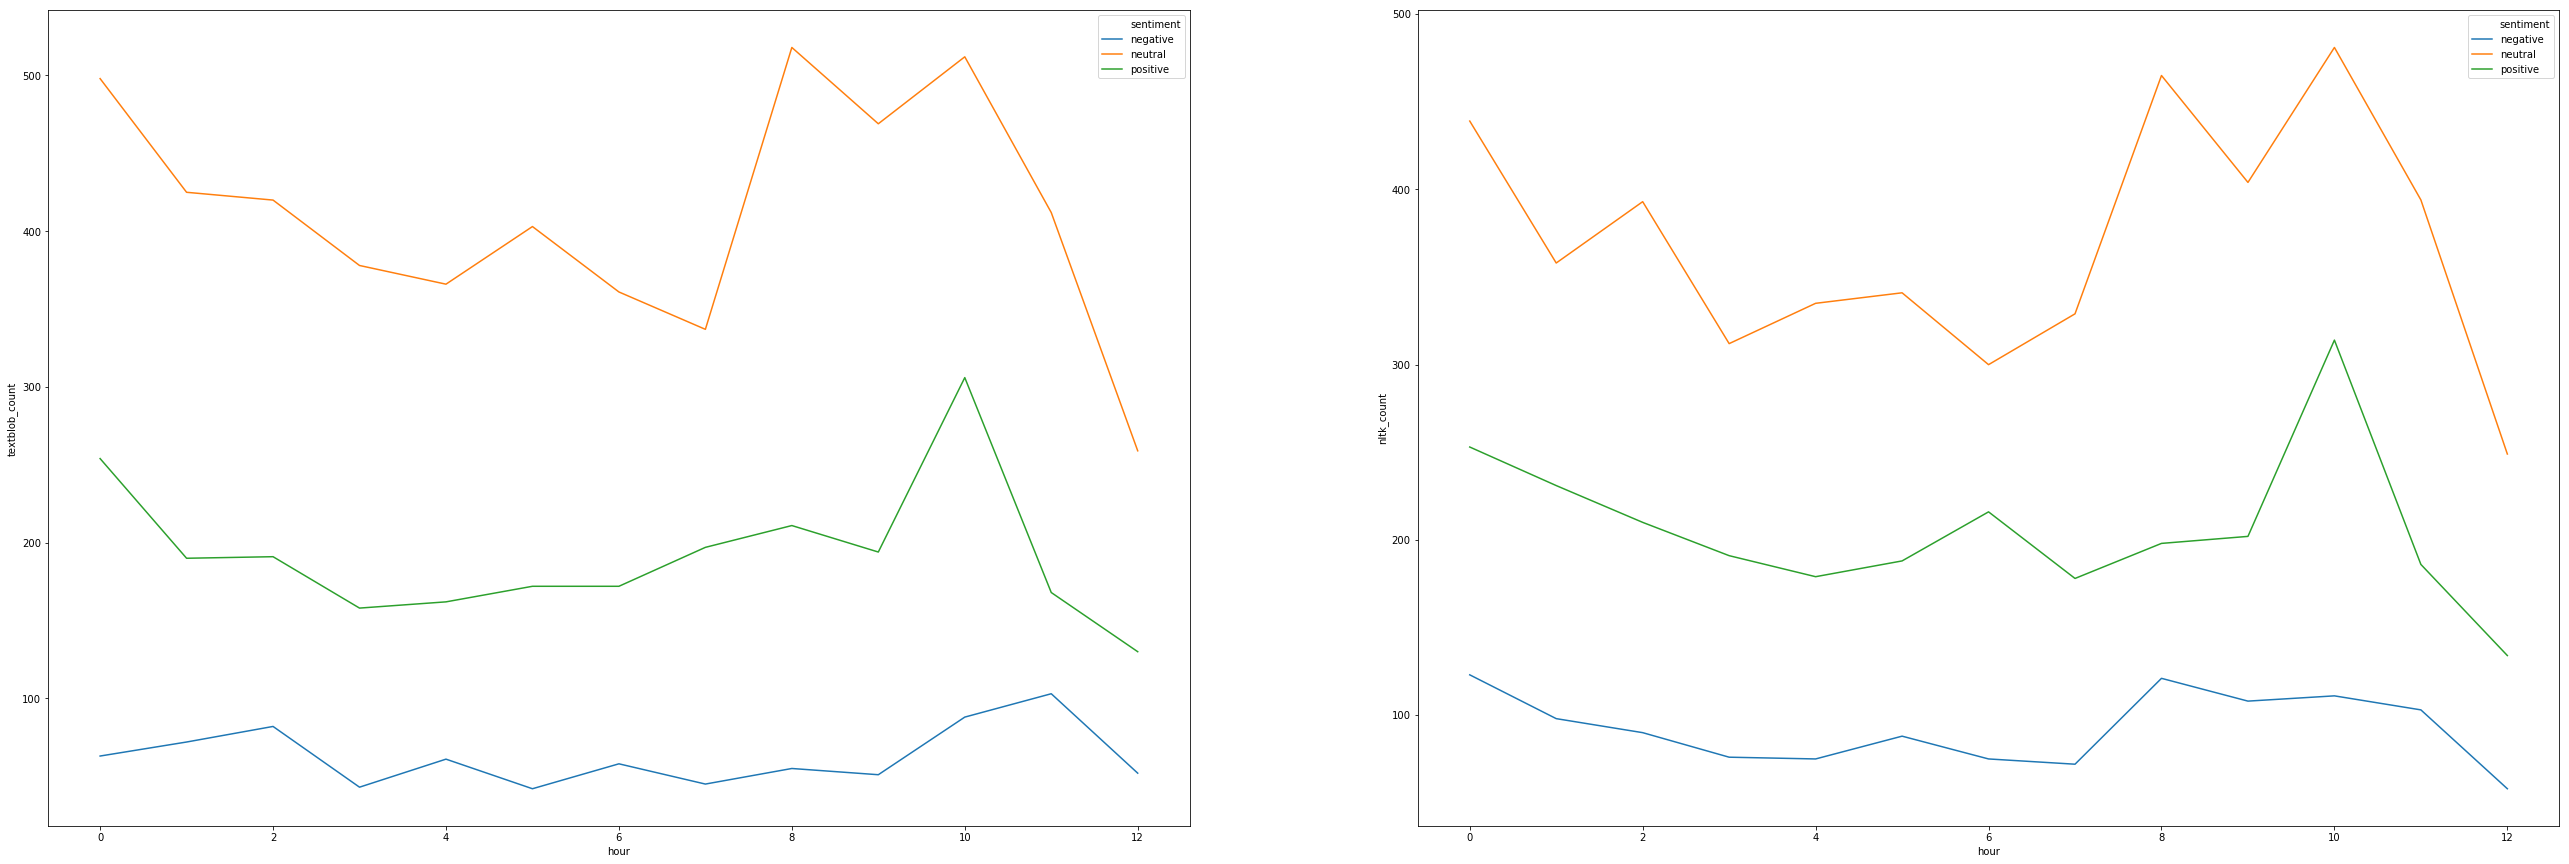

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(45,15))
sns.lineplot(x="hour", y="textblob_count", hue="sentiment", data=pnn_counts, ax=ax[0])
sns.lineplot(x="hour", y="nltk_count", hue="sentiment", data=pnn_counts, ax=ax[1])
#plt.legend(loc="upper left")